In [53]:
import pandas as pd
from datetime import timedelta
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
def read_dataframe(filename) -> pd.DataFrame:
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
        
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
        
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/timedelta(minutes=1)
    df = df[df['duration'].between(1, 60)]
    
    categorical = categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [42]:
jan = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
jan.shape[1]

19

In [43]:
jan['duration'] = (jan['tpep_dropoff_datetime'] - jan['tpep_pickup_datetime'])/timedelta(minutes=1)

jan['duration'].std()

46.44530513776499

In [47]:
jan[jan['duration'].between(1, 60)].shape[0]/jan.shape[0]

0.9827547930522406

In [48]:
df = jan[jan['duration'].between(1, 60)]

In [49]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)

train_dict = df[categorical].to_dict(orient='records')
dv = DictVectorizer()

X_train = dv.fit_transform(train_dict)

target = 'duration'
y_train = df[target].values

/var/folders/ll/23qwnskj3bs9x2k_j9r92f800000gn/T/ipykernel_61188/2893576527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.986190837370544

/var/folders/ll/23qwnskj3bs9x2k_j9r92f800000gn/T/ipykernel_61188/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/ll/23qwnskj3bs9x2k_j9r92f800000gn/T/ipykernel_61188/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

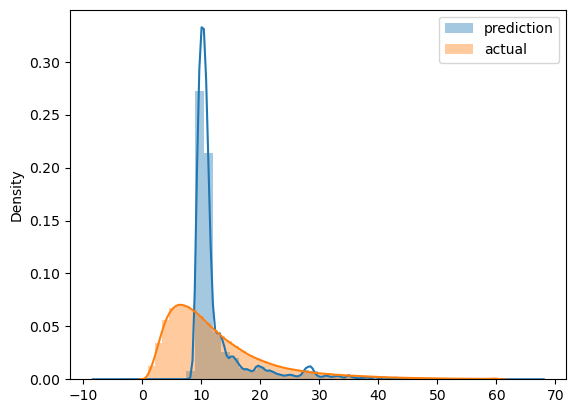

In [54]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [57]:
df_val = read_dataframe('./data/yellow_tripdata_2022-02.parquet')

In [59]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val[target].values

In [60]:
y_val_pred = lr.predict(X_val)

mean_squared_error(y_val, y_val_pred, squared=False)

7.786409085078911